# EDA (Exploratory Data Analysis) of the dataset

In this notebook, explore the Abalone dataset.

Add any relevant insight for future modelling.

# Imports

In [42]:
conda install numpy

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [38]:
conda install -c conda-forge matplotlib

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /Users/danliliu/opt/anaconda3/envs/x-hec-solution

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.1.0               |       h0dc2134_1          19 KB  conda-forge
    brotli-bin-1.1.0           |       h0dc2134_1          16 KB  conda-forge
    contourpy-1.1.1            |  py310h88cfcbd_1         214 KB  conda-forge
    cycler-0.12.1              |     pyhd8ed1ab_0          13 KB  conda-forge
    fonttools-4.43.1           |  py310hb372a2b_0         2.0 MB  conda-forge
    freetype-2.12.1            |       h60636b9_2         585 KB  conda-forge
    kiwisolver-1.4.5           |  py310h88cfcbd_1  

In [3]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 26.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 11.6 MB/s eta 0:00:0000:0100:01


In [43]:
conda list | grep numpy

numpy                     1.26.1                   pypi_0    pypi

Note: you may need to restart the kernel to use updated packages.


In [45]:
%load_ext autoreload
%autoreload 2

import pandas as pd
pd.set_option('display.max_columns', 500)
from pathlib import Path
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data

In [15]:
import os
os.getcwd()

'/Users/danliliu/Documents/DSB_M2/MLOP/xhec-mlops-project-student/notebooks'

In [30]:
# Define the relative path to the data folder
DATA_FOLDER = Path("../data")

# Construct the path to your CSV file
csv_path = DATA_FOLDER / "abalone.csv"

In [31]:
csv_path

PosixPath('../data/abalone.csv')

In [32]:
df = pd.read_csv(csv_path)

# EDA

In [33]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [35]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Whole weight'}>],
       [<Axes: title={'center': 'Shucked weight'}>,
        <Axes: title={'center': 'Viscera weight'}>,
        <Axes: title={'center': 'Shell weight'}>,
        <Axes: title={'center': 'Rings'}>]], dtype=object)

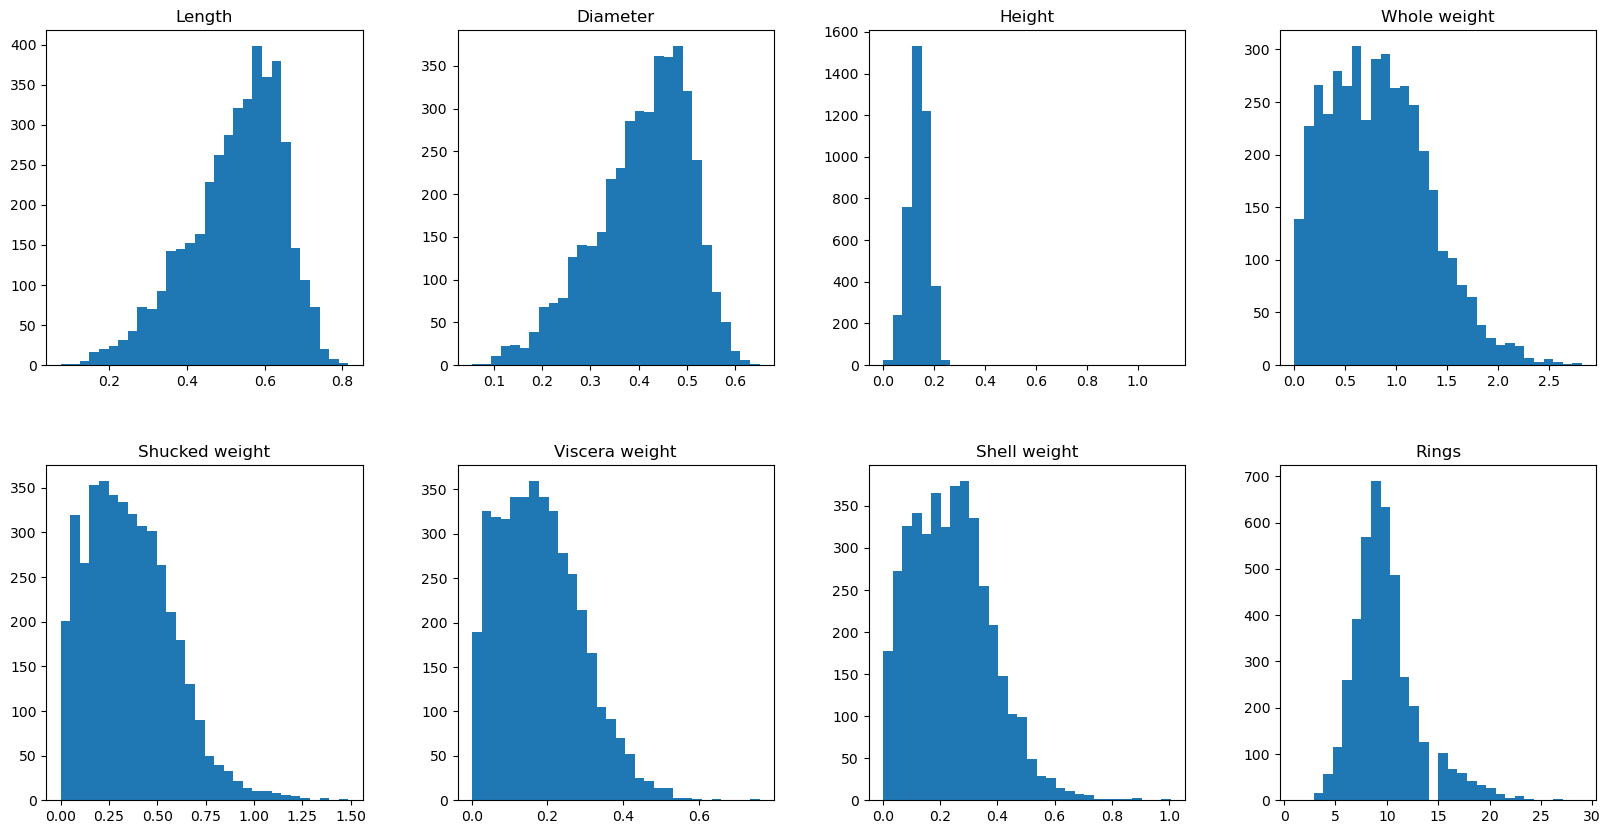

In [40]:
df.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

In [49]:
numerical_features = df.select_dtypes(include=[np.number]).columns

In [48]:
print(numerical_features)

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


In [ ]:
 df['age'] = df['Rings']+1.5
 # df.drop('Rings', axis = 1, inplace = True)

### Insights
- No missing values in the dataset
- All numerical features but 'sex': in total 9 features
- Each feature has difference scale range